<a href="https://colab.research.google.com/github/sergio-cabrales/python/blob/main/PricebyVolume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats, signal
import plotly.express as px
import plotly.graph_objects as go

import pandas_datareader as web
import datetime
import matplotlib.pyplot as plt

In [7]:
# Get the stock quote
df = web.DataReader('USDCOP=X', data_source='yahoo',start='2019-03-01', end='2021-03-12')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-01,3091.000000,3037.199951,3039.199951,3080.000000,0.0,3080.000000
2019-03-04,3094.000000,3041.600098,3041.600098,3094.000000,0.0,3094.000000
2019-03-05,3098.000000,3051.600098,3051.600098,3091.199951,0.0,3091.199951
2019-03-06,3103.699951,3054.899902,3060.199951,3095.000000,0.0,3095.000000
2019-03-07,3115.600098,3052.899902,3052.899902,3103.699951,0.0,3103.699951
...,...,...,...,...,...,...
2021-03-08,3654.429932,3602.750000,3633.399902,3633.399902,0.0,3633.399902
2021-03-09,3610.000000,3562.931641,3602.949951,3602.949951,0.0,3602.949951
2021-03-10,3592.260010,3548.729980,3590.750000,3590.750000,0.0,3590.750000


In [8]:
df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)
start_price = df['Adj_Close'].min()
stop_price = df['Adj_Close'].max()

low = start_price
# delta means granularity in volume aggregation range, it is delta in price
# the volume corresponds to price
delta = (stop_price - start_price)/50    # here we are splitting whole price range into blocks
high = 0

idx_array = []
vol_array = []
low_array = []

while high < stop_price:
    volume = 0    
    high = low + delta
    
    sub_df = df.loc[df['Adj_Close'].between(low, high, inclusive=False)]
    low_array.append(low)

    for i in sub_df.index.values:
        volume = volume + df['Volume'][i]
            
    vol_array.append(volume)
    low = high
   
for idx, var in enumerate(vol_array):
    #print("{}: {}".format(idx, var))
    idx_array.append(idx)

In [9]:
P95 = np.percentile(low_array, 95)
print(P95)
P50 = np.percentile(low_array, 50)
print(P50)
P05 = np.percentile(low_array, 5)
print(P05)

4117.957495117185
3606.824951171874
3095.6924072265624


<Figure size 2400x2400 with 0 Axes>

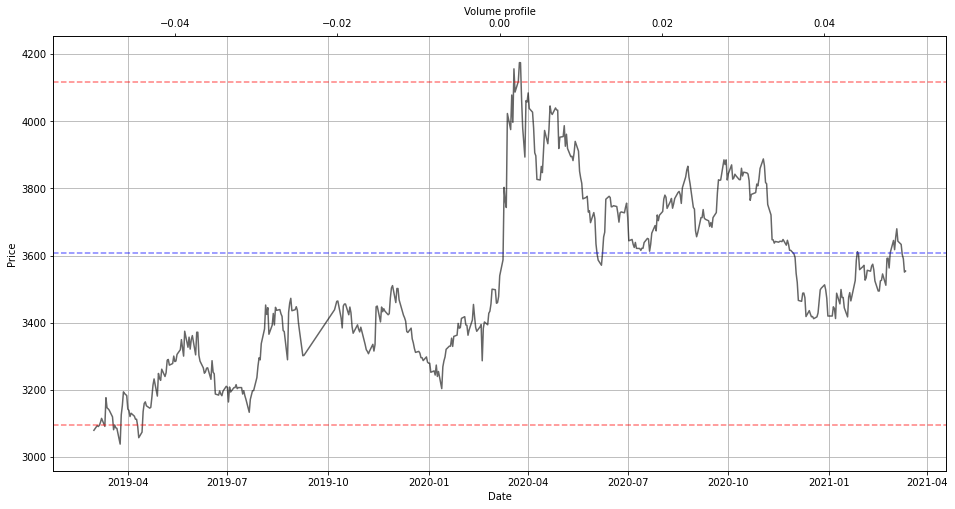

In [10]:
#price and corresponding partial volume profile
plt.figure(figsize=(20, 20), dpi= 120, facecolor='w', edgecolor='k')

#plt.subplot(321)
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(df.index, df['Adj_Close'], alpha=0.6, color='black')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Price')

ax.twiny()
h = int(df['Adj_Close'].max()/100) + 0.2
plt.barh(low_array, vol_array, alpha = 0.2, color='blue', height=h)
plt.axhline(P95, linestyle='--', alpha = 0.5, color = 'red', label='P95')
plt.axhline(P50, linestyle='--', alpha = 0.5, color = 'blue', label='P50')
plt.axhline(P05, linestyle='--', alpha = 0.5, color = 'red', label='P5')
plt.xlabel('Volume profile')
plt.ylabel('Price')

plt.show()

Text(0, 0.5, 'Price')

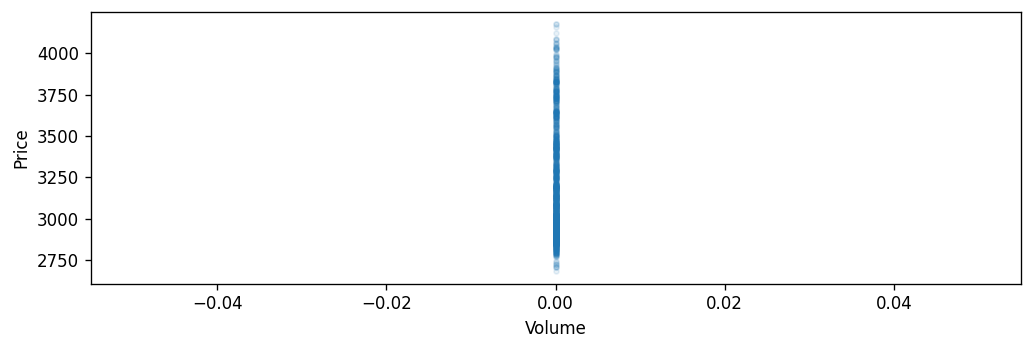

In [6]:
df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)
plt.figure(figsize=(10, 3), dpi= 120, facecolor='w', edgecolor='k')
plt.scatter(df.Volume, df.Adj_Close, alpha=0.1, marker='.')
plt.xlabel('Volume')
plt.ylabel('Price')